In [11]:
# Data was garthered from Kaggle and unsplash.com
# Then the specified number of images was hand selected

!wget 'https://www.dropbox.com/scl/fo/exictz48hl0f2dgxnhxyu/AB5X7HYo_ailNXAkK1GImCo?rlkey=yeij64l7spheyc4k7krylvek1&st=na5tgkfe&dl=0'
!unzip 'AB5X7HYo_ailNXAkK1GImCo?rlkey=yeij64l7spheyc4k7krylvek1&st=na5tgkfe&dl=0'

--2024-10-12 11:01:06--  https://www.dropbox.com/scl/fo/exictz48hl0f2dgxnhxyu/AB5X7HYo_ailNXAkK1GImCo?rlkey=yeij64l7spheyc4k7krylvek1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.85.18, 2620:100:6018:18::a27d:312
Connecting to www.dropbox.com (www.dropbox.com)|162.125.85.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://uc3c18230d41f596371943d8074a.dl.dropboxusercontent.com/zip_download_get/B_tkBEzSXcNQ7vGADcP8klAX4fYtMYWFMQR9FZlvJ5SsxAlBvThno-I4ErMffl6SSLxvAV1MOlF22IMDq3xWPqPm44smBFE8DbkBa7JbYAFyrA# [following]
--2024-10-12 11:01:07--  https://uc3c18230d41f596371943d8074a.dl.dropboxusercontent.com/zip_download_get/B_tkBEzSXcNQ7vGADcP8klAX4fYtMYWFMQR9FZlvJ5SsxAlBvThno-I4ErMffl6SSLxvAV1MOlF22IMDq3xWPqPm44smBFE8DbkBa7JbYAFyrA
Resolving uc3c18230d41f596371943d8074a.dl.dropboxusercontent.com (uc3c18230d41f596371943d8074a.dl.dropboxusercontent.com)... 162.125.81.15, 2620:100:6035:15::a27d:550f
Connecting to uc3c18230d41f596371943d8074a.dl.dr

In [17]:
import os
import random
import itertools
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.model_selection import train_test_split

In [13]:
# Data Cleansing: Function to safely load images with error handling
def load_images_from_folder(folder_path):
    image_list = []
    for filename in os.listdir(folder_path):
        file_path = os.path.join(folder_path, filename)
        if os.path.isfile(file_path):
            try:
                img = Image.open(file_path)
                image_list.append(img)
            except (IOError) as e:
                print(f"Error loading image {filename}: {e}")
    return image_list

# Load the classes to lists with error handling for corrupted images
books_orig_size = load_images_from_folder('books')
shoes_orig_size = load_images_from_folder('shoes')
chairs_orig_size = load_images_from_folder('chairs')
fridges_orig_size = load_images_from_folder('fridges')
tables_orig_size = load_images_from_folder('tables')


Error loading image Intentional_error.txt: cannot identify image file '/content/books/Intentional_error.txt'


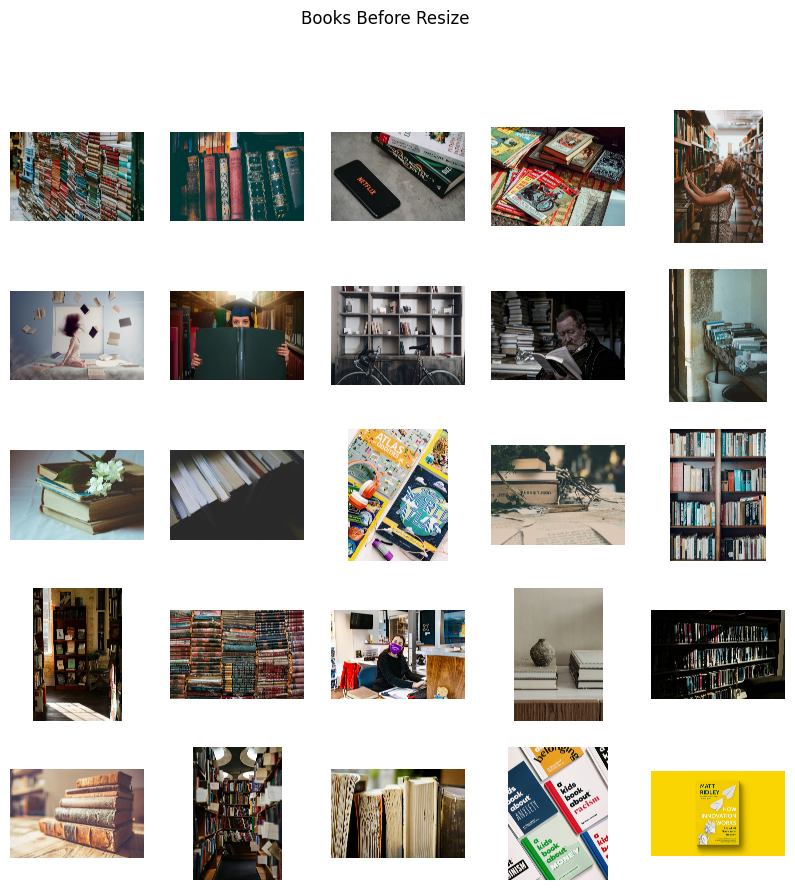

In [14]:
def display_images_from_list(images, title, labels=None):
    if labels:
        combined = list(zip(images, labels))
        random.shuffle(combined)
        images, labels = zip(*combined)
    else:
        labels = [None] * len(images)

    fig, axes = plt.subplots(5, 5, figsize=(10, 10))
    fig.suptitle(title)

    for i, (ax, img) in enumerate(zip(axes.flatten(), images[:25])):
        ax.imshow(img)
        if labels:
            ax.set_title(labels[i], fontsize=8)
        ax.axis('off')

    plt.show()

display_images_from_list(books_orig_size, 'Books Before Resize')

In [15]:
def Img_Resize(image_list, image_type, output_size=(256, 256)):
    # New size of images
    output_size = (256, 256)
    # Labels for classes
    type_dict = {'book': 0, 'chair': 1, 'table': 1, 'fridge': 1, 'shoe': 2}
    labels = {f"{image_type}_{i}": type_dict[image_type] for i in range(1, len(image_list) + 1)}
    resized_images = []

    for img in image_list:
        try:
            resized_img = img.resize(output_size)
            resized_images.append(resized_img)
        except Exception as e:
            print(f"Error resizing image: {e}")

    return resized_images, labels

In [16]:
books, books_labels = Img_Resize(books_orig_size, 'book')
books, books_labels = books[:50], dict(itertools.islice(books_labels.items(), 50))

shoes, shoes_labels = Img_Resize(shoes_orig_size, 'shoe')
shoes, shoes_labels = shoes[:50], dict(itertools.islice(shoes_labels.items(), 50))

chairs, chairs_labels = Img_Resize(chairs_orig_size, 'chair')
chairs, chairs_labels = chairs[:17], dict(itertools.islice(chairs_labels.items(), 17))

fridges, fridges_labels = Img_Resize(fridges_orig_size, 'fridge')
fridges, fridges_labels = fridges[:16], dict(itertools.islice(fridges_labels.items(), 16))

tables, tables_labels = Img_Resize(tables_orig_size, 'table')
tables, tables_labels = tables[:17], dict(itertools.islice(tables_labels.items(), 17))

In [18]:
print(chairs_labels)

{'chair_1': 1, 'chair_2': 1, 'chair_3': 1, 'chair_4': 1, 'chair_5': 1, 'chair_6': 1, 'chair_7': 1, 'chair_8': 1, 'chair_9': 1, 'chair_10': 1, 'chair_11': 1, 'chair_12': 1, 'chair_13': 1, 'chair_14': 1, 'chair_15': 1, 'chair_16': 1, 'chair_17': 1}


In [19]:
# furniture list is a combination of chairs, fridges and tables
furniture = chairs + fridges + tables
furniture_labels = {}
furniture_labels.update(chairs_labels)
furniture_labels.update(fridges_labels)
furniture_labels.update(tables_labels)

In [20]:
display_images_from_list(books, 'Books After Resize', books_labels)
display_images_from_list(shoes, 'Shoes After Resize', shoes_labels)
display_images_from_list(furniture, 'Furniture After Resize', furniture_labels)


Output hidden; open in https://colab.research.google.com to view.

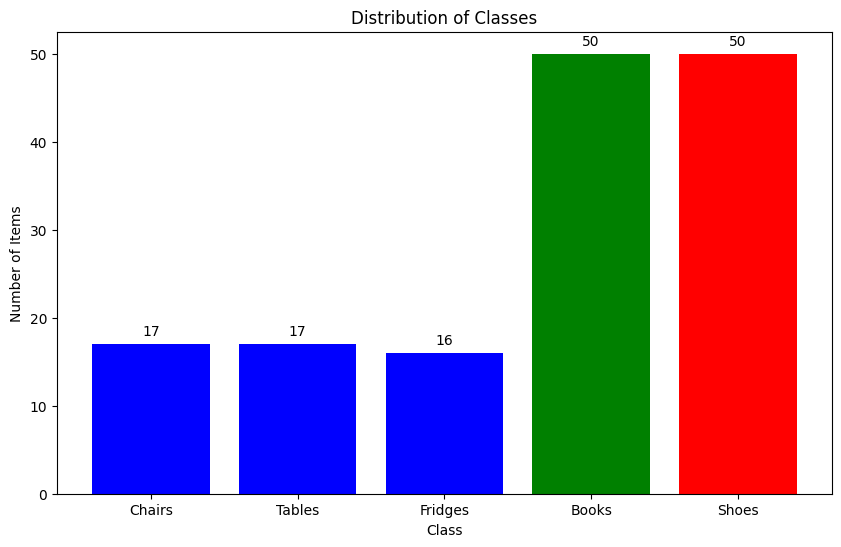

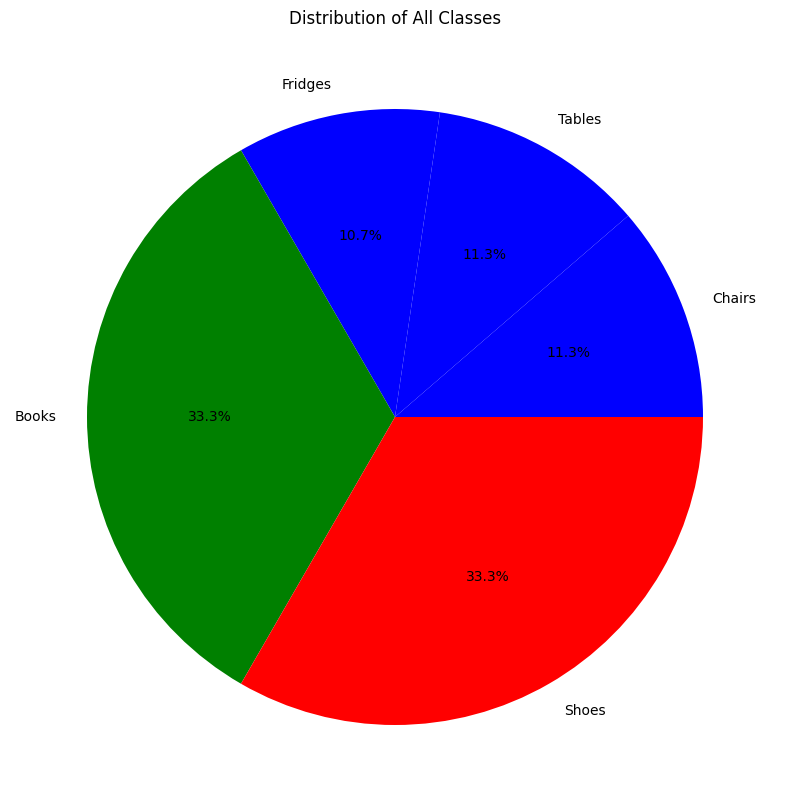

In [21]:
# Count the number of items in each class
# Combine all class counts for a single pie chart
all_counts = {
    'Chairs': len(chairs),
    'Tables': len(tables),
    'Fridges': len(fridges),
    'Books': len(books),
    'Shoes': len(shoes)
}

# Plot the distribution
plt.figure(figsize=(10, 6))
plt.bar(all_counts.keys(), all_counts.values(), color=['blue', 'blue', 'blue', 'green', 'red'])
# Add data labels to the columns
for i, (key, value) in enumerate(all_counts.items()):
    plt.text(i, value + 1, str(value), ha='center')

plt.xlabel('Class')
plt.ylabel('Number of Items')
plt.title('Distribution of Classes')
plt.figure(figsize=(10, 10))
plt.pie(all_counts.values(), labels=all_counts.keys(), autopct='%1.1f%%', colors=['blue', 'blue', 'blue', 'green', 'red'])
plt.title('Distribution of All Classes')
plt.show()

In [22]:
# Combine all images and labels
all_images = furniture + shoes + books
all_labels_list = list(furniture_labels.values()) + list(shoes_labels.values()) + list(books_labels.values())

# Split the data into train, validation, and test sets
train_images, temp_images, train_labels, temp_labels = train_test_split(all_images, all_labels_list, test_size=0.4, random_state=42)
val_images, test_images, val_labels, test_labels = train_test_split(temp_images, temp_labels, test_size=0.5, random_state=42)

# Print the sizes of the splits
print(f"Training set size: {len(train_images)}")
print(f"Validation set size: {len(val_images)}")
print(f"Test set size: {len(test_images)}")

Training set size: 90
Validation set size: 30
Test set size: 30


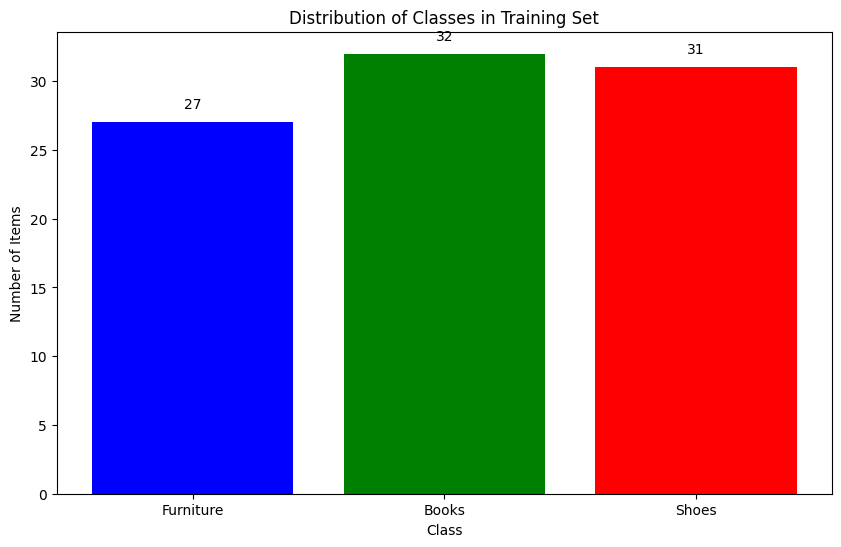

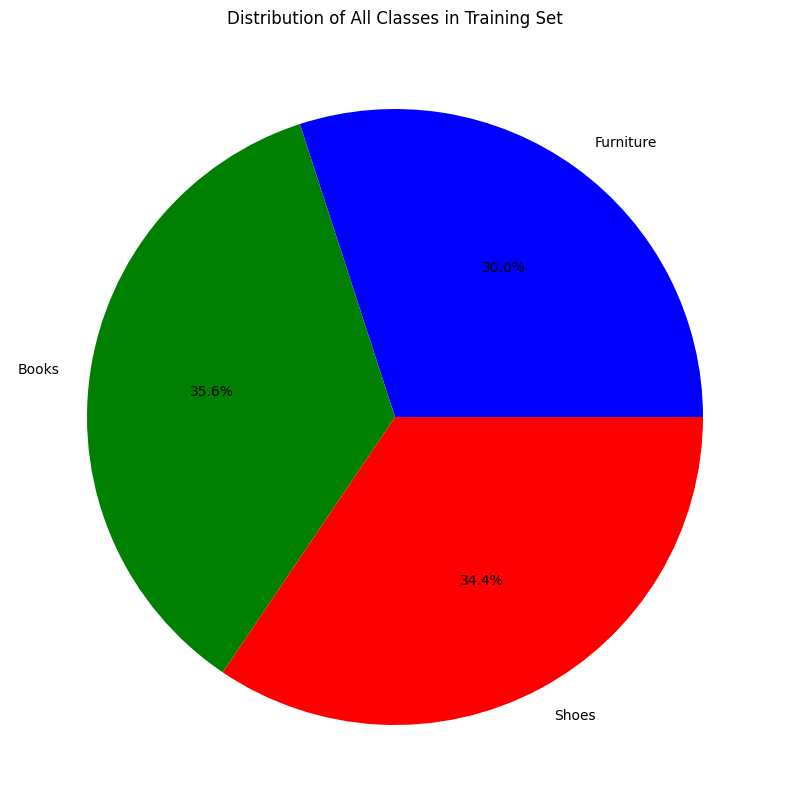

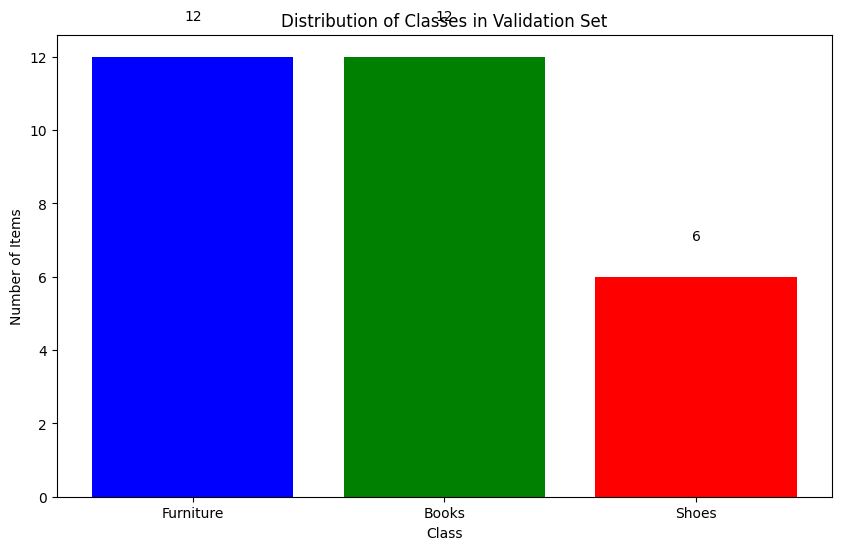

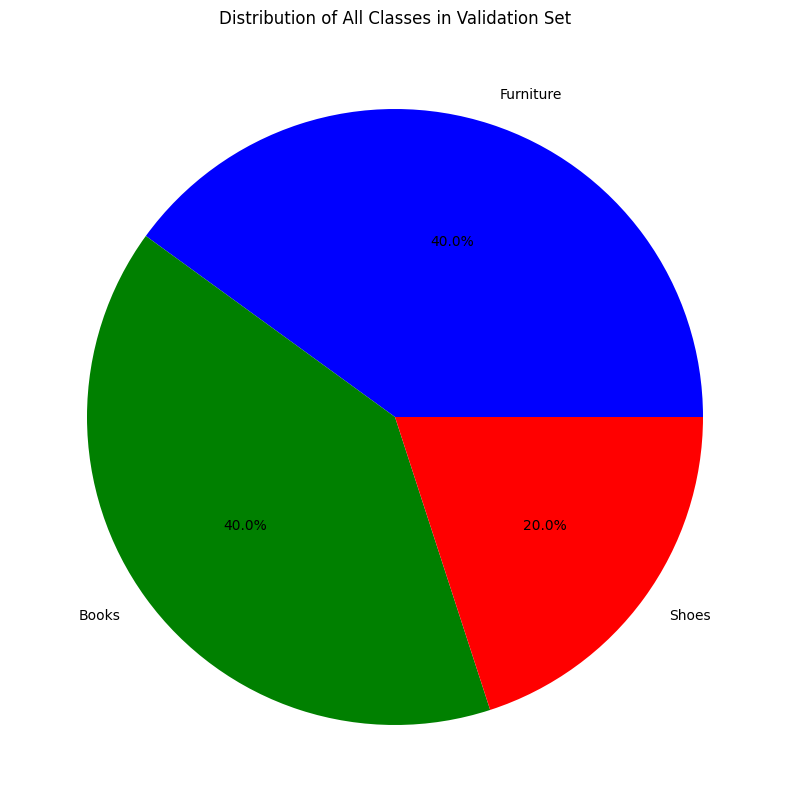

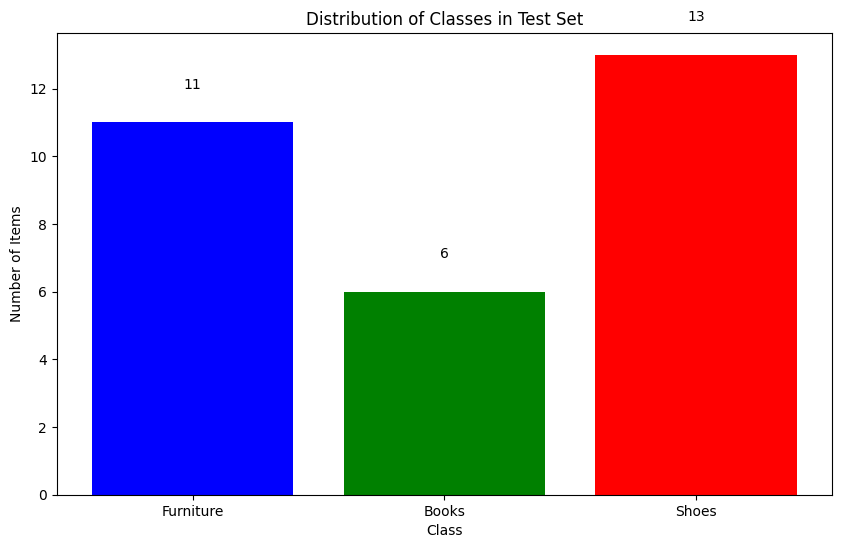

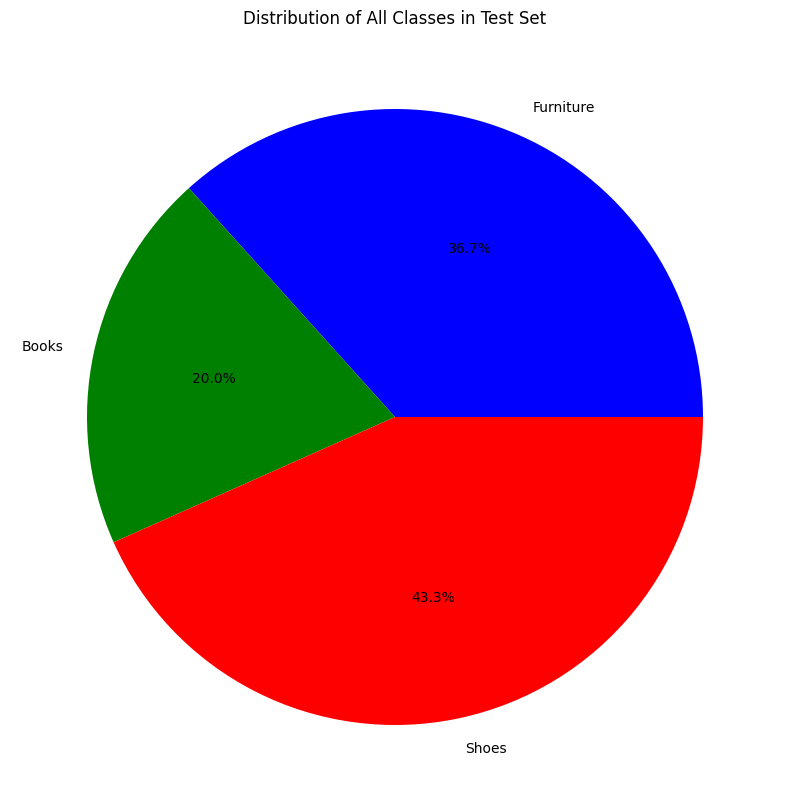

In [23]:
train_counts = {
    'Furniture': sum(1 for label in train_labels if label == 1),
    'Books': sum(1 for label in train_labels if label == 0),
    'Shoes': sum(1 for label in train_labels if label == 2)
}

# Plot the distribution for the training set
plt.figure(figsize=(10, 6))
plt.bar(train_counts.keys(), train_counts.values(), color=['blue', 'green', 'red'])
# Add data labels to the columns
for i, (key, value) in enumerate(train_counts.items()):
    plt.text(i, value + 1, str(value), ha='center')

plt.xlabel('Class')
plt.ylabel('Number of Items')
plt.title('Distribution of Classes in Training Set')
plt.figure(figsize=(10, 10))
plt.pie(train_counts.values(), labels=train_counts.keys(), autopct='%1.1f%%', colors=['blue', 'green', 'red'])
plt.title('Distribution of All Classes in Training Set')
plt.show()

# Count the number of items in each class in the validation set
val_counts = {
    'Furniture': sum(1 for label in val_labels if label == 1),
    'Books': sum(1 for label in val_labels if label == 0),
    'Shoes': sum(1 for label in val_labels if label == 2)
}

# Plot the distribution for the validation set
plt.figure(figsize=(10, 6))
plt.bar(val_counts.keys(), val_counts.values(), color=['blue', 'green', 'red'])
# Add data labels to the columns
for i, (key, value) in enumerate(val_counts.items()):
    plt.text(i, value + 1, str(value), ha='center')

plt.xlabel('Class')
plt.ylabel('Number of Items')
plt.title('Distribution of Classes in Validation Set')
plt.figure(figsize=(10, 10))
plt.pie(val_counts.values(), labels=val_counts.keys(), autopct='%1.1f%%', colors=['blue', 'green', 'red'])
plt.title('Distribution of All Classes in Validation Set')
plt.show()

# Count the number of items in each class in the test set
test_counts = {
    'Furniture': sum(1 for label in test_labels if label == 1),
    'Books': sum(1 for label in test_labels if label == 0),
    'Shoes': sum(1 for label in test_labels if label == 2)
}

# Plot the distribution for the test set
plt.figure(figsize=(10, 6))
plt.bar(test_counts.keys(), test_counts.values(), color=['blue', 'green', 'red'])
# Add data labels to the columns
for i, (key, value) in enumerate(test_counts.items()):
    plt.text(i, value + 1, str(value), ha='center')

plt.xlabel('Class')
plt.ylabel('Number of Items')
plt.title('Distribution of Classes in Test Set')
plt.figure(figsize=(10, 10))
plt.pie(test_counts.values(), labels=test_counts.keys(), autopct='%1.1f%%', colors=['blue', 'green', 'red'])
plt.title('Distribution of All Classes in Test Set')
plt.show()